# Proyecto X

## Lectura de los datos y exploración de los encabezados de los archivos.

In [ ]:
import pandas as pd

In [ ]:
geolocation = pd.read_csv('/content/Copia de ecommerce_geolocation_dataset.csv')
customers = pd.read_csv('/content/Copia de ecommerce_customers_dataset.csv')
order_items = pd.read_csv('/content/Copia de ecommerce_order_items_dataset.csv')
order_payments = pd.read_csv('/content/Copia de ecommerce_order_payments_dataset.csv')
order_reviews = pd.read_csv('/content/Copia de ecommerce_order_reviews_dataset.csv')
orders = pd.read_csv('/content/Copia de ecommerce_orders_dataset.csv')
products = pd.read_csv('/content/Copia de ecommerce_products_dataset.csv')
sellers = pd.read_csv('/content/Copia de ecommerce_sellers_dataset.csv')
category_names = pd.read_csv('/content/Copia de product_category_name_translation.csv')

In [ ]:
print(geolocation.columns.tolist())

['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng', 'geolocation_city', 'geolocation_state']


In [ ]:
print(customers.columns.tolist())

['customer_id', 'customer_unique_id', 'customer_zip_code_prefix', 'customer_city', 'customer_state']


In [ ]:
print(order_items.columns.tolist())

['order_id', 'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date', 'price', 'freight_value']


In [ ]:
print(order_payments.columns.tolist())

['order_id', 'payment_sequential', 'payment_type', 'payment_installments', 'payment_value']


In [ ]:
print(order_reviews.columns.tolist())

['review_id', 'order_id', 'review_score', 'review_comment_title', 'review_comment_message', 'review_creation_date', 'review_answer_timestamp']


In [ ]:
print(orders.columns.tolist())

['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']


In [ ]:
print(products.columns.tolist())

['product_id', 'product_category_name', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']


In [ ]:
print(sellers.columns.tolist())

['seller_id', 'seller_zip_code_prefix', 'seller_city', 'seller_state']


In [ ]:
print(category_names.columns.tolist())

['product_category_name', 'product_category_name_english']


## BBT1-14 Creación de la base de datos y carga de datos

Crear una conexión a la base de datos de SQLite llamada ecommerce.db Importar los archivos y guardar los DataFrames en la base de datos como tablas:

ecommerce_customers_dataset.csv

ecommerce_order_items_dataset.csv

ecommerce_order_payments_dataset.csv

ecommerce_order_reviews_dataset.csv

ecommerce_orders_dataset.csv

ecommerce_products_dataset.csv

ecommerce_sellers_dataset.csv

product_category_name_translation.csv

In [ ]:
import sqlite3 as sql

#Conexion a la base de datos
conn = sql.connect('ecommerce.db')
cursor = conn.cursor()

#script de creacion de tablas
script = '''
CREATE TABLE products (
    product_id TEXT PRIMARY KEY,
    product_category_name TEXT,
    product_name_lenght REAL,
    product_description_lenght REAL,
    product_photos_qty REAL,
    product_weight_g REAL,
    product_length_cm REAL,
    product_height_cm REAL,
    product_width_cm REAL
);
CREATE TABLE order_items (
    order_id TEXT,
    order_item_id INTEGER,
    product_id TEXT,
    seller_id TEXT,
    shipping_limit_date TEXT,
    price REAL,
    freight_value REAL,
    PRIMARY KEY (order_id, order_item_id)
);
CREATE TABLE order_payments (
    order_id TEXT,
    payment_sequential INTEGER,
    payment_type TEXT,
    payment_installments INTEGER,
    payment_value REAL,
    PRIMARY KEY(order_id,payment_sequential)
);
CREATE TABLE orders (
    order_id TEXT PRIMARY KEY,
    customer_id TEXT,
    order_status TEXT,
    order_purchase_timestamp TEXT,
    order_approved_at TEXT,
    order_delivered_carrier_date TEXT,
    order_delivered_customer_date TEXT,
    order_estimated_delivery_date TEXT
);
CREATE TABLE customers (
    customer_id TEXT PRIMARY KEY,
    customer_unique_id TEXT,
    customer_zip_code_prefix INTEGER,
    customer_city TEXT,
    customer_state TEXT
);
CREATE TABLE geolocation(
  geolocation_zip_code_prefix INTEGER PRIMARY KEY ,
  geolocation_lat REAL,
  geolocation_lng REAL,
  geolocation_city TEXT,
  geolocation_state TEXT
);
CREATE TABLE order_review(
  review_id TEXT,
  order_id TEXT,
  review_score INT,
  review_comment_title TEXT,
  review_comment_message TEXT,
  review_creation_date TEXT,
  review_answer_timestamp TEXT
  PRIMARY KEY(order_id,review_id)
);
CREATE TABLE sellers(
  seller_id TEXT PRIMARY KEY,
  seller_zip_code_prefix INTEGER,
  seller_city TEXT,
  seller_state TEXT
);
CREATE TABLE category(
  product_category_name TEXT,
  product_category_name_english TEXT
);
'''
cursor.executescript(script)
conn.commit()


OperationalError: ignored

Inserción de los datos de los csv a la base de datos

In [ ]:
geolocation.to_sql('geolocation',conn, index=True, if_exists='replace')
customers.to_sql('customers',conn, index=True, if_exists='replace')
order_items.to_sql('order_items',conn, index=True, if_exists = 'replace')
order_payments.to_sql('order_payments',conn, index=True, if_exists = 'replace')
order_reviews.to_sql('order_review',conn, index=True, if_exists = 'replace')
orders.to_sql('orders',conn, index=True, if_exists = 'replace')
products.to_sql('products',conn, index=True, if_exists = 'replace')
sellers.to_sql('sellers',conn, index=True, if_exists = 'replace')
category_names.to_sql('category',conn, index=True, if_exists = 'replace')

71

**Creación de tabla geolocation2 con latitudes y longitudes promedio.**

Con el fin de evitar la duplicidad de datos usando el criterio de promediar latitudes y longitudes agrupando por código postal.

In [ ]:
query_geo = '''
  SELECT geolocation_zip_code_prefix, AVG(geolocation_lat) as promedio_latitud, AVG(geolocation_lng) as promedio_longitud, geolocation_city, geolocation_state
  FROM geolocation
  GROUP BY geolocation_zip_code_prefix
  ORDER BY geolocation_zip_code_prefix;
  '''
geo_2 = pd.read_sql_query(query_geo, conn)

geo_2.set_index('geolocation_zip_code_prefix', inplace=True)

In [ ]:
geo_2.to_sql('geolocation2', conn, index=True, if_exists='replace')
geo_2.head(5)

,promedio_latitud,promedio_longitud,geolocation_city,geolocation_state
geolocation_zip_code_prefix,,,,
1001,-23.550190,-46.634024,sao paulo,SP
1002,-23.548146,-46.634979,sao paulo,SP
1003,-23.548994,-46.635731,sao paulo,SP
1004,-23.549799,-46.634757,sao paulo,SP
1005,-23.549456,-46.636733,sao paulo,SP


## BBT1-21  Extracción de datos desde las tablas orders_items y products

Crear un DataFrame que contenga el JOIN de la tabla orders_items (oi) y tabla products (p).  
Extraer los datos de items con categorias

In [ ]:
BBT1_21_query = '''
SELECT oi.*, p.product_category_name
FROM order_items oi
JOIN products p ON oi.product_id = p.product_id
ORDER BY p.product_category_name ASC;
'''

BBT1_21 = pd.read_sql_query(BBT1_21_query, conn)
BBT1_21.head(5)

,index,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name
0,123,0046e1d57f4c07c8c92ab26be8c3dfc0,1,ff6caf9340512b8bf6d2a2a6df032cfa,38e6dada03429a47197d5d584d793b41,2017-10-02 15:49:17,7.79,7.78,None
1,125,00482f2670787292280e0a8153d82467,1,a9c404971d1a5b1cbc2e4070e02731fd,702835e4b785b67a084280efca355756,2017-02-17 16:18:07,7.60,10.96,None
2,132,004f5d8f238e8908e6864b874eda3391,1,5a848e4ab52fd5445cdc07aab1c40e48,c826c40d7b19f62a09e2d7c5e7295ee2,2018-03-06 09:29:25,122.99,15.61,None
3,142,0057199db02d1a5ef41bacbf41f8f63b,1,41eee23c25f7a574dfaf8d5c151dbb12,e5a3438891c0bfdb9394643f95273d8e,2018-01-25 09:07:51,20.30,16.79,None
4,171,006cb7cafc99b29548d4f412c7f9f493,1,e10758160da97891c2fdcbc35f0f031d,323ce52b5b81df2cd804b017b7f09aa7,2018-02-22 13:35:28,56.00,14.14,None


## BBT1-22 Extracción de datos desde las tablas order y payments

Crear un DataFrame que contenga el JOIN de la tabla orders (o) y tabla payments (op). Extraer los datos de órdenes con sus pagos asociados.

In [ ]:
BBT1_22_query = '''
  SELECT o.customer_id, o.order_id, o.order_status, op.payment_type, op.payment_value,
         op.payment_sequential, op.payment_installments, o.order_purchase_timestamp, o.order_approved_at,
         o.order_delivered_carrier_date, o.order_delivered_customer_date, o.order_estimated_delivery_date
  FROM orders o
  JOIN order_payments op ON o.order_id = op.order_id
  ;
'''

BBT1_22 = pd.read_sql_query(BBT1_22_query, conn)
BBT1_22.head(5)

,customer_id,order_id,order_status,payment_type,payment_value,payment_sequential,payment_installments,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,9ef432eb6251297304e76186b10a928d,e481f51cbdc54678b7cc49136f2d6af7,delivered,credit_card,18.12,1,1,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,9ef432eb6251297304e76186b10a928d,e481f51cbdc54678b7cc49136f2d6af7,delivered,voucher,18.59,2,1,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
2,9ef432eb6251297304e76186b10a928d,e481f51cbdc54678b7cc49136f2d6af7,delivered,voucher,2.00,3,1,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
3,b0830fb4747a6c6d20dea0b8c802d7ef,53cdb2fc8bc7dce0b6741e2150273451,delivered,boleto,141.46,1,1,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
4,41ce2a54c0b03bf3443c3d931a367089,47770eb9100c2d0c44946d9cf07ec65d,delivered,credit_card,179.12,1,3,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00


## BBT1-31 Filtrar datos, reducir volumen de orders_items y products

Filtrar el DataFrame de las categorías e ítems para resguardar los 3 ítems de mayor importe.   
PARA: Reducir el volumen de datos y trabajar solo con los ítems que mayor ingreso generan por categoría.

In [ ]:
#Guardar el DF en la base de datos como tabla
BBT1_21.to_sql('Query_BBT1_21', conn, if_exists='replace', index=True)

112650

In [ ]:
#Filtrar el DataFrame de las categorías e ítems para resguardar los 3 ítems de mayor importe por categoria

BBT1_31_query = '''
SELECT product_id, product_category_name, price, freight_value, year_month
FROM (
  SELECT product_id, product_category_name, price, freight_value, strftime('%Y-%m', shipping_limit_date) AS year_month,
         ROW_NUMBER() OVER (PARTITION BY product_category_name ORDER BY price DESC) AS rn
  FROM Query_BBT1_21
) ranked
  WHERE rn <=3
  ORDER BY product_category_name ASC;
'''

BBT1_31 = pd.read_sql_query(BBT1_31_query, conn)
BBT1_31.head(9)

,product_id,product_category_name,price,freight_value,year_month
0,4c50dcc50f1512f46096d6ef0142c4a9,None,3980.00,62.74,2017-02
1,0e030462875259ec0cb868f7ecf1fd5e,None,2740.00,54.50,2017-05
2,eed5cbd74fac3bd79b7c7ec95fa7507d,None,1989.00,34.58,2017-10
3,2b69866f22de8dad69c976771daba91c,agro_industria_e_comercio,2990.00,194.55,2017-11
4,b7a60a397d4efd05c1b5d398fb9f9097,agro_industria_e_comercio,2399.00,68.33,2017-11
5,cd2f5c10e4e8dbc701f0bb68a09fdfe8,agro_industria_e_comercio,2199.00,116.83,2017-12
6,21b4d9c7183dd6f20f584f35c09bd361,alimentos,274.99,10.74,2017-09
7,618c65cb5359281b2c830b9f3f2e1f36,alimentos,219.00,19.58,2018-08
8,53d71d8d9d6878f6f0b9fe0ed79445d5,alimentos,210.00,16.57,2018-06


## BBT1-32 Filtrar datos, reducir volumen de order y payments

Filtrar el DataFrame de órdenes y pagos para resguardar los 3 pagos de mayor importe por cliente.   
PARA: Reducir el volumen de datos y trabajar solo con los clientes que generan mas ingreso y analizar sus métodos de pagos.

In [ ]:
#Guardar el DF en la base de datos como tabla
BBT1_22.to_sql('Query_BBT1_22', conn, if_exists='replace', index=True)

103886

A fin de analizar la ordenes de mayor valor, y poder a su vez analizar sus métodos de pago, se crea una CTE que sume los pagos parciales por método de pago de cada orden, para poder en primera instancia reconocer las ordenes de mayor valor y luego analizar luego sus métodos de pago.
Dado que los clientes que generaron mayores ingresos no realizaron más de 3 pagos, se limitan a 20 los registros para analisis.

In [ ]:
#Filtrar el DataFrame de ordenes y pagos para resguardar las ordenes que generaron mayores ingresos.

BBT1_32_query = '''
WITH OrderTotal AS (
    SELECT order_id, sum(payment_value) as total_price
    FROM Query_BBT1_22
    GROUP BY order_id
  )

  SELECT strftime('%Y-%m', order_purchase_timestamp) AS year_month, q.customer_id, q.order_id, q.order_status, q.payment_type, q.payment_value, ot.total_price
  FROM Query_BBT1_22 q
  JOIN OrderTotal ot ON ot.order_id = q.order_id
  ORDER BY total_price DESC, customer_id

  ;

'''

BBT1_32 = pd.read_sql_query(BBT1_32_query, conn)
BBT1_32

,year_month,customer_id,order_id,order_status,payment_type,payment_value,total_price
0,2017-09,1617b1357756262bfa56ab541c47bc16,03caa2c082116e1d31e67e9ae3700499,delivered,credit_card,13664.08,13664.08
1,2018-07,ec5b2ba62e574342386871631fafd3fc,736e1922ae60d0d6a89247b851902527,delivered,boleto,7274.88,7274.88
2,2017-02,c6e2731c5b391845f6800c97401a43a9,0812eb902a67711a1cb742b3cdaa65ae,delivered,credit_card,6929.31,6929.31
3,2018-07,f48d464a0baaea338cb25f816991ab1f,fefacc66af859508bf1a7934eab1e97f,delivered,boleto,6922.21,6922.21
4,2017-05,3fd6777bbce08a352fddd04e4a7cc8f6,f5136e38d1a14a4dbd87dff67da82701,delivered,boleto,6726.66,6726.66
...,...,...,...,...,...,...,...
103881,2018-08,a790343ca6f3fee08112d678b43aa7c5,f1d5c2e6867fa93ceee9ef9b34a53cbf,delivered,credit_card,0.31,9.59
103882,2018-08,a790343ca6f3fee08112d678b43aa7c5,f1d5c2e6867fa93ceee9ef9b34a53cbf,delivered,voucher,9.28,9.59
103883,2018-08,197a2a6a77da93f678ea0d379f21da0a,c8c528189310eaa44a745b8d9d26908b,canceled,not_defined,0.00,0.00
103884,2018-08,3532ba38a3fd242259a514ac2b6ae6b6,00b1cb0320190ca0daa2c88b35206009,canceled,not_defined,0.00,0.00


In [ ]:
#Guardar el DF en la base de datos como tabla para analizar
BBT1_32.to_sql('Query_BBT1_32', conn, if_exists='replace', index=True)

103886

Se genera segundo filtro sobre el DF generado en esta story para analizar los métodos de pago de las ordenes que generaron mayores ingresos.

In [ ]:
BBT1_32_query_bis = '''
SELECT year_month, payment_type, sum(payment_value) AS ingreso_total, count(payment_type) as cant_transacciones
FROM Query_BBT1_32
GROUP BY payment_type, year_month
ORDER BY ingreso_total DESC
;
'''

BBT1_32_bis = pd.read_sql_query(BBT1_32_query_bis, conn)
BBT1_32_bis

,year_month,payment_type,ingreso_total,cant_transacciones
0,2017-11,credit_card,942856.67,5897
1,2018-04,credit_card,934306.00,5455
2,2018-03,credit_card,933770.10,5691
3,2018-05,credit_card,927556.35,5497
4,2018-01,credit_card,868880.38,5520
...,...,...,...,...
85,2016-09,credit_card,252.24,3
86,2016-10,debit_card,241.73,2
87,2016-12,credit_card,19.62,1
88,2018-08,not_defined,0.00,2


## BBT1-41 Carga de datos, generacion de archivos .csv de orders_items y products

Generar archivos .csv a partir del Dataframe generado de orders_items y products.
Los archivos deben cumplir los siguientes requerimientos:
Contener cabecera.
Separador “,”.
Ser guardados en un directorio llamado Results\Analysis_D.
PARA: Resguardar los datos enriquecidos, según requerimiento.

**Se omite la creación del directorio y se asume que el directorio especificado ya existe:**

In [ ]:
#Nombre del archivo.csv
csv_filename = 'BBT1_31.csv'

# Ruta completa del archivo CSV
csv_path = 'Results/Analysis_D/' + csv_filename

BBT1_31.to_csv('BBT1_31.csv', index=False, sep=',', header=True)

print(f'Archivo CSV guardado en: {csv_path}')

Archivo CSV guardado en: Results/Analysis_D/BBT1_31.csv


## BBT1-42 Carga de datos, generacion de archivos .csv  de order y payments

Generar archivos .csv a partir del Dataframe generado de orders y payments.
Los archivos deben cumplir los siguientes requerimientos:
Contener cabecera.
Separador “,”.
Ser guardados en un directorio llamado Results\Analysis_E.
PARA: Resguardar los datos enriquecidos, según requerimiento.

**Se omite la creación del directorio y se asume que el directorio especificado ya existe:**

In [ ]:
#Nombre del archivo.csv
csv_filename = 'BBT1_32.csv'

# Ruta completa del archivo CSV
csv_path = 'Results/Analysis_E/' + csv_filename

BBT1_32.to_csv('BBT1_32.csv', index=False, sep=',', header=True)

print(f'Archivo CSV guardado en: {csv_path}')

Archivo CSV guardado en: Results/Analysis_E/BBT1_32.csv


Se realiza el guardado de la segunda consulta del filtrado tambien.

In [ ]:
#Nombre del archivo.csv
csv_filename = 'BBT1_32_bis.csv'

# Ruta completa del archivo CSV
csv_path = 'Results/Analysis_E/' + csv_filename

BBT1_32_bis.to_csv('BBT1_32_bis.csv', index=False, sep=',', header=True)

print(f'Archivo CSV guardado en: {csv_path}')

Archivo CSV guardado en: Results/Analysis_E/BBT1_32_bis.csv


## BBT1-51 Extraccion de datos desde .csv, análisis D

QUIERO: Cargar los datos del análisis D generados en un DataFrame.
PARA: Poder analizar el conjunto de datos.

In [ ]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.1-py2.py3-none-any.whl size=311285387 sha256=1dbc8c7a22c96125fe6922a8eee87839330a34c86cbe6c4ea1200782d6a312b7
  Stored in directory: /root/.cache/pip/wheels/0d/77/a3/ff2f74cc9ab41f8f594dabf0579c2a7c6de920d584206e0834
Successfully built pyspark


In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import date_format
spark = SparkSession.builder.getOrCreate()

In [ ]:
path_bbt1_31 = '/content/BBT1_31.csv'
bbt1_21_spark = spark.read.load(path_bbt1_31, format='csv', sep=',', inferSchema='true', header='true')

#Transformo la columna year_month a año y mes.
bbt1_21_spark = bbt1_21_spark.withColumn("year", date_format("year_month", "yyyy"))
bbt1_21_spark.show(6)

+--------------------+---------------------+------+-------------+-------------------+----+
|          product_id|product_category_name| price|freight_value|         year_month|year|
+--------------------+---------------------+------+-------------+-------------------+----+
|4c50dcc50f1512f46...|                 null|3980.0|        62.74|2017-02-01 00:00:00|2017|
|0e030462875259ec0...|                 null|2740.0|         54.5|2017-05-01 00:00:00|2017|
|eed5cbd74fac3bd79...|                 null|1989.0|        34.58|2017-10-01 00:00:00|2017|
|2b69866f22de8dad6...| agro_industria_e_...|2990.0|       194.55|2017-11-01 00:00:00|2017|
|b7a60a397d4efd05c...| agro_industria_e_...|2399.0|        68.33|2017-11-01 00:00:00|2017|
|cd2f5c10e4e8dbc70...| agro_industria_e_...|2199.0|       116.83|2017-12-01 00:00:00|2017|
+--------------------+---------------------+------+-------------+-------------------+----+
only showing top 6 rows



## BBT1-52 Extraccion de datos desde .csv, análisis E

QUIERO: Cargar los datos del análisis E generados en un DataFrame.
PARA: Poder analizar el conjunto de datos.

In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()

In [ ]:
path_bbt1_32 = '/content/BBT1_32.csv'
bbt1_32_spark = spark.read.load(path_bbt1_32, format='csv', sep=',', inferSchema='true', header='true')

#Transformo la columna year_month a año y mes.
bbt1_32_spark = bbt1_32_spark.withColumn("year_month", date_format("year_month", "yyyy-MM"))
bbt1_32_spark.show(5)

+----------+--------------------+--------------------+------------+------------+-------------+-----------+
|year_month|         customer_id|            order_id|order_status|payment_type|payment_value|total_price|
+----------+--------------------+--------------------+------------+------------+-------------+-----------+
|   2017-09|1617b1357756262bf...|03caa2c082116e1d3...|   delivered| credit_card|     13664.08|   13664.08|
|   2018-07|ec5b2ba62e5743423...|736e1922ae60d0d6a...|   delivered|      boleto|      7274.88|    7274.88|
|   2017-02|c6e2731c5b391845f...|0812eb902a67711a1...|   delivered| credit_card|      6929.31|    6929.31|
|   2018-07|f48d464a0baaea338...|fefacc66af859508b...|   delivered|      boleto|      6922.21|    6922.21|
|   2017-05|3fd6777bbce08a352...|f5136e38d1a14a4db...|   delivered|      boleto|      6726.66|    6726.66|
+----------+--------------------+--------------------+------------+------------+-------------+-----------+
only showing top 5 rows



Extraccion de datos desde segunda tabla creada anteriormente

In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()

In [ ]:
path_bbt1_32_bis = '/content/BBT1_32_bis.csv'
bbt1_32_bis_spark = spark.read.load(path_bbt1_32_bis, format='csv', sep=',', inferSchema='true', header='true')

#Transformo la columna year_month a año y mes.
bbt1_32_bis_spark = bbt1_32_bis_spark.withColumn("year_month", date_format("year_month", "yyyy-MM"))
bbt1_32_bis_spark.show(5)

+----------+------------+-----------------+------------------+
|year_month|payment_type|    ingreso_total|cant_transacciones|
+----------+------------+-----------------+------------------+
|   2017-11| credit_card|942856.6699999924|              5897|
|   2018-04| credit_card| 934305.999999998|              5455|
|   2018-03| credit_card|933770.0999999971|              5691|
|   2018-05| credit_card|927556.3500000016|              5497|
|   2018-01| credit_card|868880.3800000001|              5520|
+----------+------------+-----------------+------------------+
only showing top 5 rows



## BBT1-61 Creacion de vistas temporales, análisis D

Generar una vista temporal a partir del DataFrame de Análisis D.
PARA: Preparar los datos para trabajar con SparkSQL.

In [ ]:
# Creo vista temporal a partir de DF de Analisis D
bbt1_21_spark.createOrReplaceTempView('Vista_D')

In [ ]:
# Visualizacion
consulta_vista_D = spark.sql('SELECT * FROM Vista_D')
consulta_vista_D.show(6)

+--------------------+---------------------+------+-------------+-------------------+----+
|          product_id|product_category_name| price|freight_value|         year_month|year|
+--------------------+---------------------+------+-------------+-------------------+----+
|4c50dcc50f1512f46...|                 null|3980.0|        62.74|2017-02-01 00:00:00|2017|
|0e030462875259ec0...|                 null|2740.0|         54.5|2017-05-01 00:00:00|2017|
|eed5cbd74fac3bd79...|                 null|1989.0|        34.58|2017-10-01 00:00:00|2017|
|2b69866f22de8dad6...| agro_industria_e_...|2990.0|       194.55|2017-11-01 00:00:00|2017|
|b7a60a397d4efd05c...| agro_industria_e_...|2399.0|        68.33|2017-11-01 00:00:00|2017|
|cd2f5c10e4e8dbc70...| agro_industria_e_...|2199.0|       116.83|2017-12-01 00:00:00|2017|
+--------------------+---------------------+------+-------------+-------------------+----+
only showing top 6 rows



## BBT1-62 Creacion de vistas temporales, análisis E

Generar una vista temporal a partir del DataFrame de Análisis E.
PARA: Preparar los datos para trabajar con SparkSQL.

In [ ]:
# Creo vista temporal a partir de DF de Analisis E
bbt1_32_spark.createOrReplaceTempView('Vista_E')

In [ ]:
# Visualizacion
consulta_vista_E = spark.sql('SELECT * FROM Vista_E')
consulta_vista_E.show(5)

+----------+--------------------+--------------------+------------+------------+-------------+-----------+
|year_month|         customer_id|            order_id|order_status|payment_type|payment_value|total_price|
+----------+--------------------+--------------------+------------+------------+-------------+-----------+
|   2017-09|1617b1357756262bf...|03caa2c082116e1d3...|   delivered| credit_card|     13664.08|   13664.08|
|   2018-07|ec5b2ba62e5743423...|736e1922ae60d0d6a...|   delivered|      boleto|      7274.88|    7274.88|
|   2017-02|c6e2731c5b391845f...|0812eb902a67711a1...|   delivered| credit_card|      6929.31|    6929.31|
|   2018-07|f48d464a0baaea338...|fefacc66af859508b...|   delivered|      boleto|      6922.21|    6922.21|
|   2017-05|3fd6777bbce08a352...|f5136e38d1a14a4db...|   delivered|      boleto|      6726.66|    6726.66|
+----------+--------------------+--------------------+------------+------------+-------------+-----------+
only showing top 5 rows



In [ ]:
# Creo vista temporal a partir de DF de Analisis E - Anexo Metodos de pago
bbt1_32_bis_spark.createOrReplaceTempView('Vista_E_bis')

In [ ]:
# Visualizacion
consulta_vista_E_bis = spark.sql('SELECT * FROM Vista_E_bis')
consulta_vista_E_bis.show(5)

+----------+------------+-----------------+------------------+
|year_month|payment_type|    ingreso_total|cant_transacciones|
+----------+------------+-----------------+------------------+
|   2017-11| credit_card|942856.6699999924|              5897|
|   2018-04| credit_card| 934305.999999998|              5455|
|   2018-03| credit_card|933770.0999999971|              5691|
|   2018-05| credit_card|927556.3500000016|              5497|
|   2018-01| credit_card|868880.3800000001|              5520|
+----------+------------+-----------------+------------------+
only showing top 5 rows



## BBT1-71 Querys en spark SQL, análisis D

COMO: desarrollador
QUIERO: Generar una consulta que cumpla los siguientes puntos:
Totalizar por las órdenes más vendidas por categoria, por año y mes limite de entrega sumando monto de envio y promedio de monto de envio.

PARA: Enriquecer el análisis de los datos según requerimiento. Para entender las frecuencia de compra y la incidencia de los envios por categoria de los productos.

In [ ]:
from pyspark.sql.functions import year, month
from pyspark.sql.window import Window
from pyspark.sql.functions import sum, avg, row_number

In [ ]:
spark = SparkSession.builder.appName("ConsultaSparkSQL").getOrCreate()

Dado que dicha consulta proviene de un filtrado de tres datos por categoria, la frecuencia de compra iba a dar una sola unidad mensual, por lo cual se realizó el filtro solamente por año.

In [ ]:
analisis_D = spark.sql("""
    SELECT
        product_category_name,
        year,
        ROUND(SUM(freight_value),2) AS total_monto_envio,
        ROUND(AVG(freight_value),2) AS promedio_monto_envio,
        count(freight_value) AS cant_envios
    FROM
        Vista_D
    GROUP BY
        product_category_name, year
    ORDER BY total_monto_envio DESC
    LIMIT 20
""")

analisis_D.show()

+---------------------+----+-----------------+--------------------+-----------+
|product_category_name|year|total_monto_envio|promedio_monto_envio|cant_envios|
+---------------------+----+-----------------+--------------------+-----------+
| utilidades_domest...|2018|           750.56|              375.28|          2|
|                bebes|2018|            538.0|              179.33|          3|
|        esporte_lazer|2018|           493.66|              164.55|          3|
|      cama_mesa_banho|2018|            476.7|               158.9|          3|
|          eletronicos|2018|           428.42|              142.81|          3|
|      eletroportateis|2017|           421.44|              140.48|          3|
| agro_industria_e_...|2017|           379.71|              126.57|          3|
| industria_comerci...|2018|           360.14|              180.07|          2|
|     eletrodomesticos|2018|           348.45|              116.15|          3|
|             pet_shop|2017|           3

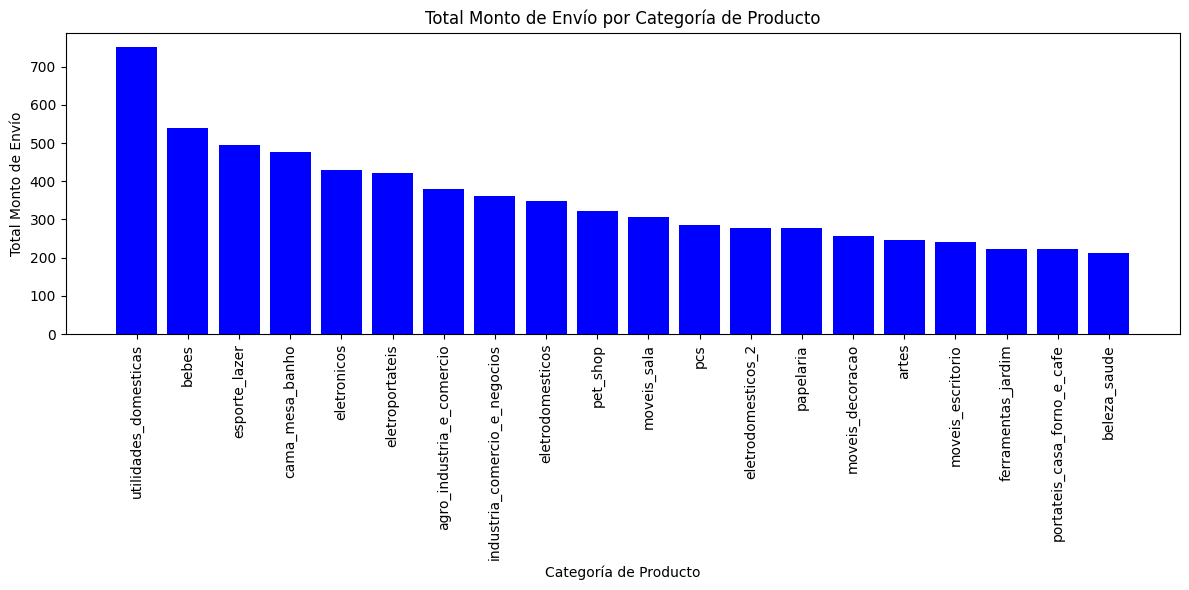

In [ ]:
import matplotlib.pyplot as plt

# Paleta de colores para el gráfico
palette_color = sns.color_palette('pastel')
sns.lineplot(data=data, palette='pastel')

# Extraer los datos de analisis_D en listas separadas
product_category_name = [row.product_category_name for row in analisis_D.collect()]
year = [row.year for row in analisis_D.collect()]
total_monto_envio = [row.total_monto_envio for row in analisis_D.collect()]

# Crear un gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(product_category_name, total_monto_envio, color='blue')
plt.xlabel('Categoría de Producto')
plt.ylabel('Total Monto de Envío')
plt.title('Total Monto de Envío por Categoría de Producto')
plt.xticks(rotation=90)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


## BBT1-72 Querys en spark SQL, análisis E

Descripción

COMO: desarrollador
QUIERO: Generar una consulta que cumpla los siguientes puntos:
Totalizar por las órdenes más vendidas por método de pago, por año y mes sumando monto y promedio de compra..

PARA: Enriquecer el análisis de los datos según requerimiento. Para entender las frecuencia de compra y la incidencia de los métodos de pago.

In [ ]:
analisis_E = spark.sql("""
    SELECT
        payment_type,
        year_month,
        ROUND(SUM(payment_value),2) AS total_ingresos,
        ROUND(AVG(payment_value),2) AS promedio_ingresos,
        count(payment_type) as cant_transacciones
    FROM
        Vista_E
    WHERE payment_type = 'credit_card' OR payment_type = 'boleto'
          OR payment_type = 'debit_card' OR payment_type = 'voucher'
    GROUP BY
        payment_type, year_month
    ORDER BY year_month ASC
    limit 10
""")

analisis_E.show()

+------------+----------+--------------+-----------------+------------------+
|payment_type|year_month|total_ingresos|promedio_ingresos|cant_transacciones|
+------------+----------+--------------+-----------------+------------------+
| credit_card|   2016-09|        252.24|            84.08|                 3|
|      boleto|   2016-10|       9679.06|           153.64|                63|
| credit_card|   2016-10|      48290.62|           190.12|               254|
|  debit_card|   2016-10|        241.73|           120.87|                 2|
|     voucher|   2016-10|        879.07|            38.22|                23|
| credit_card|   2016-12|         19.62|            19.62|                 1|
|      boleto|   2017-01|      24074.43|           122.21|               197|
|  debit_card|   2017-01|        743.53|            82.61|                 9|
| credit_card|   2017-01|     109615.68|           188.02|               583|
|     voucher|   2017-01|        4054.4|            66.47|      

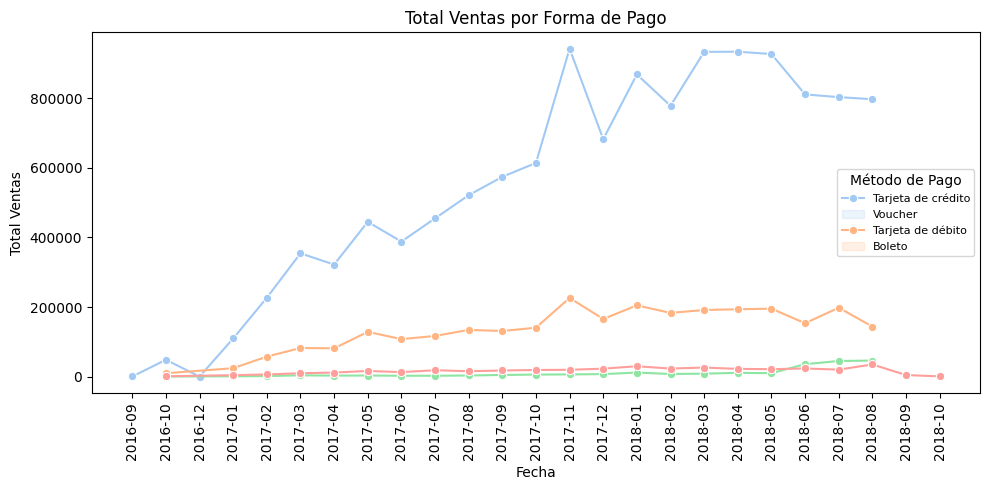

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

payment_type = [row.payment_type for row in analisis_E.collect()]
year_month = [row.year_month for row in analisis_E.collect()]
total_ingresos = [row.total_ingresos for row in analisis_E.collect()]

# Crear un DataFrame a partir de las listas
data = pd.DataFrame({'Fecha': year_month, 'Total Ingresos': total_ingresos, 'Payment Type': payment_type})

# Paleta de colores para el gráfico
palette_color = sns.color_palette('pastel')

# Crear un gráfico de series con Seaborn separando por Payment Type
plt.figure(figsize=(10, 5))
sns.lineplot(data=data, x='Fecha', y='Total Ingresos', hue='Payment Type', palette='pastel', markers=True, marker='o')
plt.xlabel('Fecha')
plt.ylabel('Total Ventas')
plt.title('Total Ventas por Forma de Pago')
plt.xticks(rotation=90)
plt.legend(title='Método de Pago')

# Modificar los nombres de las etiquetas en la leyenda
font = {'size': 8}
etiquetas_personalizadas = ['Tarjeta de crédito', 'Voucher', 'Tarjeta de débito', 'Boleto']
plt.legend(title='Método de Pago', labels=etiquetas_personalizadas, loc='center right', prop=font)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


## BBT1-81 Carga de datos, generacion de archivos .parquet de análisis D

COMO: desarrollador
QUIERO: Guardar las agregaciones generadas en un archivo parquet dentro de un directorio llamado Results_Parquets\Analysis_D, XXXXXXX.
PARA: Dar acceso a los datos a otros interesados.

In [ ]:
ruta_guardado = 'Results_Parquets\Analysis_D/BBT1_71'
analisis_D.write.parquet(ruta_guardado)

print(f'Archivo Parquet guardado en: {ruta_guardado}')

Archivo Parquet guardado en: Results_Parquets\Analysis_D/BBT1_71


## BBT1-82 Carga de datos, generacion de archivos .parquet de análisis E

COMO: desarrollador
QUIERO: Guardar las agregaciones generadas en un archivo parquet dentro de un directorio llamado Results_Parquets\Analysis_E, XXXXXXX.
PARA: Dar acceso a los datos a otros interesados.

In [ ]:
ruta_guardado = 'Results_Parquets\Analysis_E/BBT1_72'
analisis_E.write.parquet(ruta_guardado)

print(f'Archivo Parquet guardado en: {ruta_guardado}')

Archivo Parquet guardado en: Results_Parquets\Analysis_E/BBT1_72
